In [7]:
N=ord("G")%3+1  #3
print("Варіант ",N)

Варіант  3


In [22]:
import numpy as np
import  csv

In [23]:
def get_column(filename, column_name):
    with open(filename, 'r') as file:
        csvreader = csv.reader(file)
        header = next(csvreader)  
        
    
        if column_name in header:
            column_index = header.index(column_name)
        else:
            print(f"Стовпець '{column_name}' не знайдено у файлі {filename}")
            return np.array([])  

        column_data = []
        for row in csvreader:
            #column_data.append(row[column_index].strip())
            column_data.append(int(row[column_index]))

        data = np.array(column_data)[::-1]
    
    return data


filename = r"C:\Users\Gleb\Desktop\russia_losses_equipment.csv"
column_name = "APC"
data = get_column(filename, column_name)
print(data)


[  516   706   706 ... 19339 19355 19369]


In [12]:
def daily_losses(data):
    return np.insert(np.diff(data), 0, data[0])

    
daily_losses_result = daily_losses(data)

print("Добові втрати БТР:\n", daily_losses_result)

Добові втрати БТР:
 [516 190   0 ...  33  16  14]


In [13]:
def top_n_daily_losses(daily_losses_data, n):
    return np.sort(daily_losses_data)[-n:][::-1]  

n=5
print(f"Топ {n} найбільших добових втрат БТР:",top_n_daily_losses(daily_losses_result, n))


Топ 5 найбільших добових втрат БТР: [516 190 120 110  96]


In [15]:
def get_column_date(filename, column_name):
    with open(filename, 'r') as file:
        csvreader = csv.reader(file)
        header = next(csvreader) 
        
        if column_name in header:
            column_index = header.index(column_name)
        else:
            print(f"Стовпець '{column_name}' не знайдено у файлі {filename}")
            return np.array([])  

        column_data = []
        for row in csvreader:
            column_data.append(row[column_index].strip())
            #column_data.append(int(row[column_index]))

        data = np.array(column_data)[::-1]
    
    return data
def summer_losses(filename):
 
    dates = get_column_date(filename, "date") 
    apc = daily_losses(get_column(filename, "APC"))  

    arrange = np.array(list(zip(dates, apc)))

    index_first_day_of_summer = np.where(arrange[:, 0] == '2024-06-01')[0][0]
    index_last_day_of_summer = np.where(arrange[:, 0] == '2024-09-30')[0][0]

  
    summer_losses = arrange[index_first_day_of_summer:index_last_day_of_summer + 1]

   
    summer_losses_int = np.array(summer_losses[:, 1], dtype=int)

    return np.sum(summer_losses_int)


filename = r"C:\Users\Gleb\Desktop\russia_losses_equipment.csv"
total_summer_losses = summer_losses(filename)
print(f"Кількість знищених БТР влітку 2024 року: {total_summer_losses}")

Кількість знищених БТР влітку 2024 року: 2568


In [17]:
def average_losses_in_range(daily_losses_data, start_day, end_day):
    # Перевіряємо, чи індекси не виходять за межі даних
    if start_day < 0 or end_day > len(daily_losses_data) or start_day >= end_day:
        print("Неправильний інтервал")
        return None
    return  np.sum(daily_losses_data[start_day:end_day]) / (end_day - start_day)

# Приклад використання
filename = r"C:\Users\Gleb\Desktop\russia_losses_equipment.csv"
apc_losses = get_column(filename, "APC") 
daily_losses_result = daily_losses(data)

start_day = 100
end_day = 500
average_loss = average_losses_in_range(daily_losses_result, start_day, end_day)
print(f"Середнє значення знищених БТР за {start_day}–{end_day} дні війни: {average_loss}")


Середнє значення знищених БТР за 100–500 дні війни: 11.4625


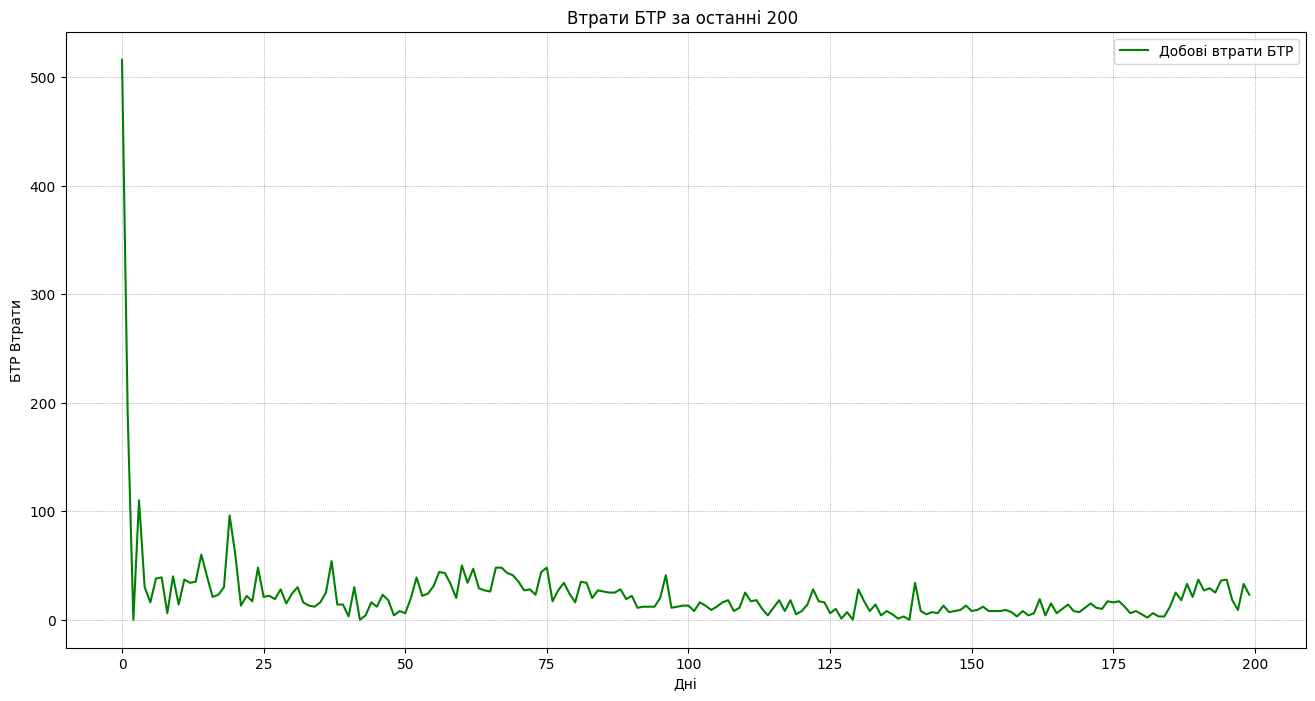

In [21]:
import matplotlib.pyplot as plt

def plot_last_200_days_losses(data,filename):
    last_200_days_losses = data[:200]

   
    plt.figure(figsize=(16, 8), dpi=100)
    plt.plot(last_200_days_losses, linestyle='-', color='green', label='Добові втрати БТР')

    plt.title("Втрати БТР за останні 200 ")
    plt.xlabel("Дні")
    plt.ylabel("БТР Втрати")
    plt.legend(loc="upper right")

    plt.grid(color='gray', linestyle=':', linewidth=0.5)

    plt.savefig(filename)
    plt.show()
filename_save = r"C:\Users\Gleb\Desktop\phyton\7\last_200_days_losses.png"
plot_last_200_days_losses(daily_losses(get_column(filename, "APC")),filename_save)
